In [34]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='not majority')
from imblearn.under_sampling import RandomUnderSampler
from keras import backend as K # a specialized, well-optimized tensor manipulation library to do so, serving as the “backend engine” of Keras

from sklearn.model_selection import GridSearchCV #Exhaustive search over specified parameter values for an estimator. automated finding of optimal paramaters


#from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Dataset columns

#age : age in years
#sex : (1 = male; 0 = female)
#cp : chest pain type
#trestbps : resting blood pressure (in mm Hg on admission to the hospital)
#chol : serum cholestoral in mg/dl
#fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecg : resting electrocardiographic results
#thalach : maximum heart rate achieved
#exang : exercise induced angina (1 = yes; 0 = no)
#oldpeak : ST depression induced by exercise relative to rest
#slope : the slope of the peak exercise ST segment
#ca : number of major vessels (0-3) colored by flourosopy
#thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
#target : 1 or 0

In [35]:
#here we load the dataset to a pandas dataframe named heart_df
heart_df = pd.read_csv(r'C:\DecisionTheoryHeartDiseaseDataset\Dataset1.csv', encoding='utf8')

In [36]:
heart_df.shape # 14 variables as in the description,with the shape() command we see how many rows and columns we have in the dataframe

(303, 14)

In [37]:
heart_df['target'].nunique()#we search for the number of unique values for the target variable

2

In [38]:
print(heart_df['target'].nunique)

<bound method IndexOpsMixin.nunique of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64>


In [39]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
heart_df.isnull().sum() #we see if we have null values in our dataset by checking the sum of possible one's

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [41]:
heart_df.describe()#see various statistical features for the dataframe variables

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


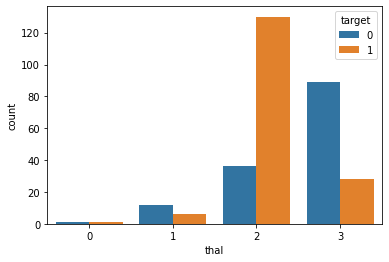

In [42]:
ax = sns.countplot(x='thal', hue="target", data=heart_df)
    
plt.show()

In [45]:
heart_df[heart_df['thal'] == 0].count() # so we have only 2 rows with thal = 0 out of 303,this value is an outlier compared to the other values for the variable also we believe it does not represent a spesific value for thal like we have showed in the variables description

age         2
sex         2
cp          2
trestbps    2
chol        2
fbs         2
restecg     2
thalach     2
exang       2
oldpeak     2
slope       2
ca          2
thal        2
target      2
dtype: int64

In [46]:
#thal  A blood disorder called thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect), we drop the 0 value since it applys to very few speciments and it doesnt correspond to one of the values of thal that have been defined,so they are seen as outliers
#thal_zero = heart_df[heart_df['thal'] == 0]
#print("Patients with 0 thal" ,thal_zero)

heart_df = heart_df[heart_df['thal'] > 0]

# we remove the rows with ca = 4 which is faulty since it goes from 0 to 3
heart_df[heart_df['ca'] == 4]
heart_df = heart_df[heart_df['ca'] < 4]


In [47]:
heart_df.shape

(296, 14)

In [ ]:
#list of numerical/continuous values : age,trestbps,chol,thalach,oldpeak,

#list of categorical values: sex,cp,fbs,restegcg,exang,slope,ca,thal,target

In [73]:
#We have to explain what each variable means so we can understand their relations between them and their possible effect on results:

#age: The person's age in years
#sex: The person's sex (1 = male, 0 = female)
#cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
#trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
#chol: The person's cholesterol measurement in mg/dl
#fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
#restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
#thalach: The person's maximum heart rate achieved
#exang: Exercise induced angina (1 = yes; 0 = no)
#oldpeak: ST depression induced by exercise relative to rest
#slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
#ca: The number of major vessels (0-3)
#thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
#target: Heart disease (0 = no, 1 = yes)   


In [48]:
heart_cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

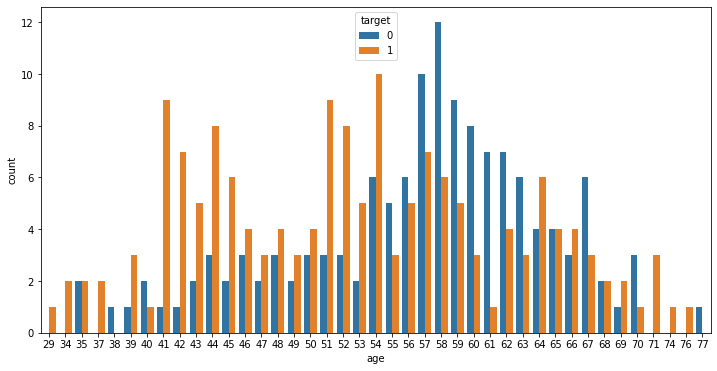

In [49]:
ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(x='age', hue="target", data=heart_df)
    
plt.show()

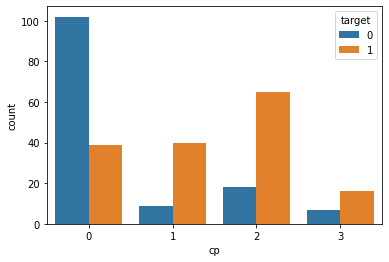

In [50]:
ax = sns.countplot(x='cp', hue="target", data=heart_df)
    
plt.show()

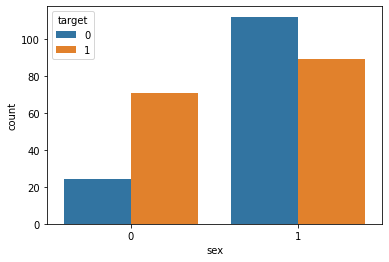

In [51]:
ax = sns.countplot(x='sex', hue="target", data=heart_df)#1-male,0-female
    
plt.show()

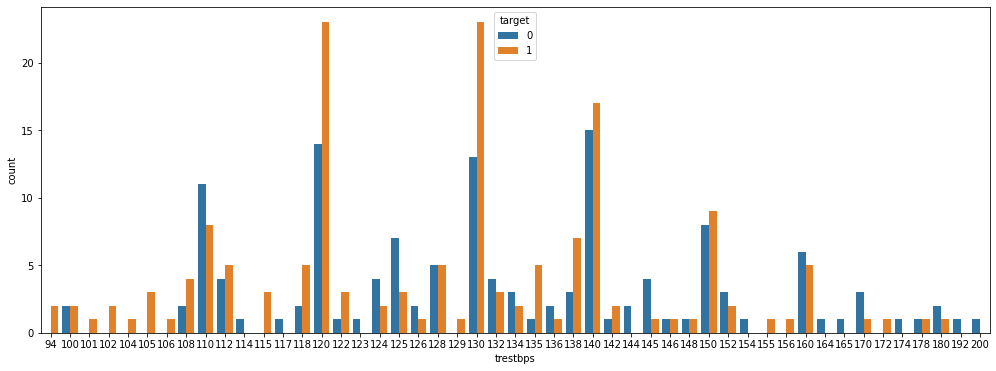

In [52]:
ax = plt.subplots(figsize=(17, 6))
ax = sns.countplot(x='trestbps', hue="target", data=heart_df)
    
plt.show()


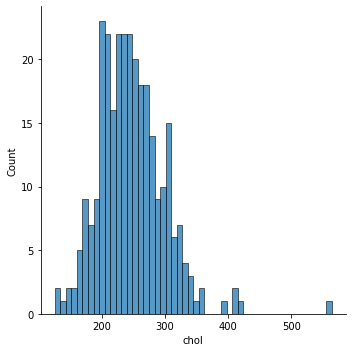

In [53]:
#chol

ax = sns.displot(heart_df,x = "chol",bins=50)
plt.show()


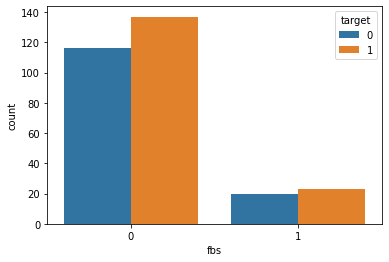

In [54]:
ax = sns.countplot(x='fbs', hue="target", data=heart_df)
    
plt.show()

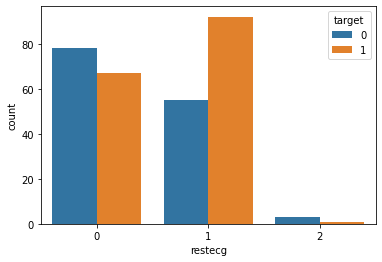

In [55]:
#restecg

ax = sns.countplot(x='restecg', hue="target", data=heart_df)
    
plt.show()


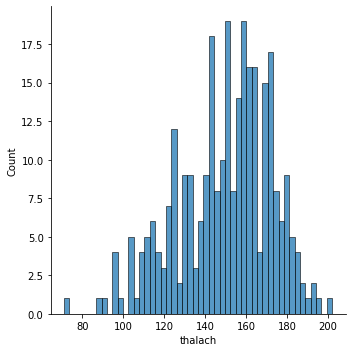

In [56]:
ax = sns.displot(heart_df,x = "thalach",bins=50)
plt.show()


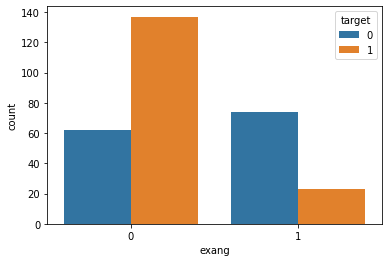

In [57]:
ax = sns.countplot(x='exang', hue="target", data=heart_df)
    
plt.show()

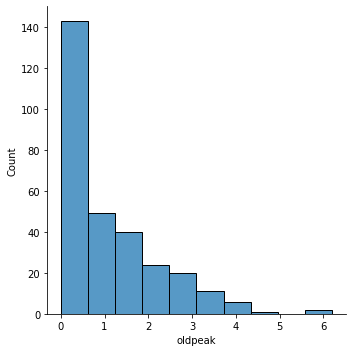

In [58]:
ax = sns.displot(heart_df,x = "oldpeak",bins=10)
plt.show()

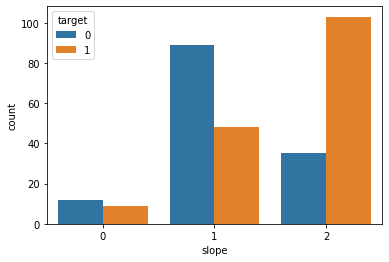

In [59]:
ax = sns.countplot(x='slope', hue="target", data=heart_df)
    
plt.show()

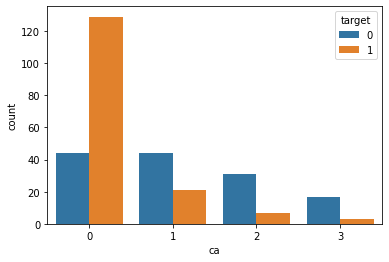

In [60]:
#ca
ax = sns.countplot(x='ca', hue="target", data=heart_df)
    
plt.show()

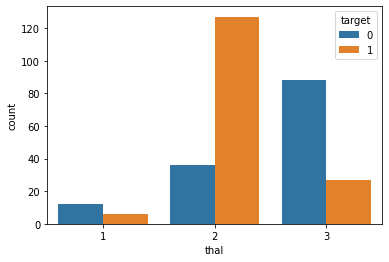

In [61]:
ax = sns.countplot(x='thal', hue="target", data=heart_df)
    
plt.show()

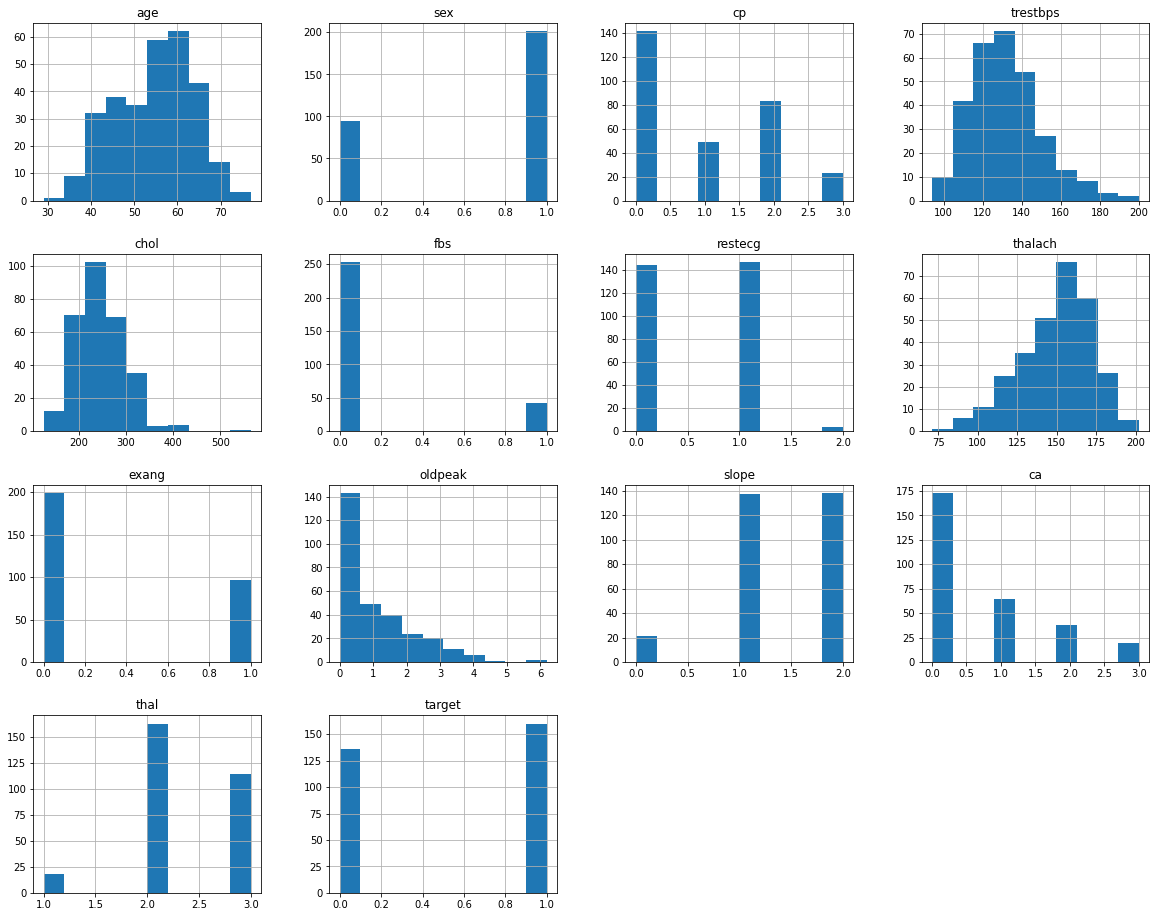

In [62]:
heart_df.hist(figsize=(20,16))#check the imbalances in certain features like fbs and try to see if fixing them will improve classification perfomance
plt.show()

In [63]:
heart_df.shape

(296, 14)

In [64]:
correlation = heart_df.corr()#store correlation information for the dataframe between its variables

In [65]:
correlation['target'].sort_values(ascending=False)

#we calculate the correlation of the dataset variables with the target variable
#the correlation coefficient has a range from from -1 to +1.
#when the coefficient is close to +1 this means a strong positive correlation and when the coefficient is close to -1 this means a strong negative correlation
#when the coefficient is close to 0 then that means that there is no correlation

target      1.000000
thalach     0.426655
cp          0.423425
slope       0.337825
restecg     0.131716
fbs        -0.004680
chol       -0.076541
trestbps   -0.148922
age        -0.225453
sex        -0.285322
thal       -0.364399
exang      -0.425085
oldpeak    -0.428804
ca         -0.467158
Name: target, dtype: float64

In [33]:
#from the above correlation values with respect to the target variable we can see the following:

#fbs,chol are very near to 0 which means they have very little correlation with the target variable 

# the other variables like thalach,cp,oldpeak,exang seem to go about +0.4 or -0,4 each so that doesnt show a particular strong or negative correlation for them with the target variable but shows they have a moderate amount of correlation with the target

#variables like restegcg.testbps,age,sex show little positive or negative correlation with the target variable so that means they affect the target variable in a minor way,less than what the above variables do with around +0.4 or -0.4 in most cases correlation

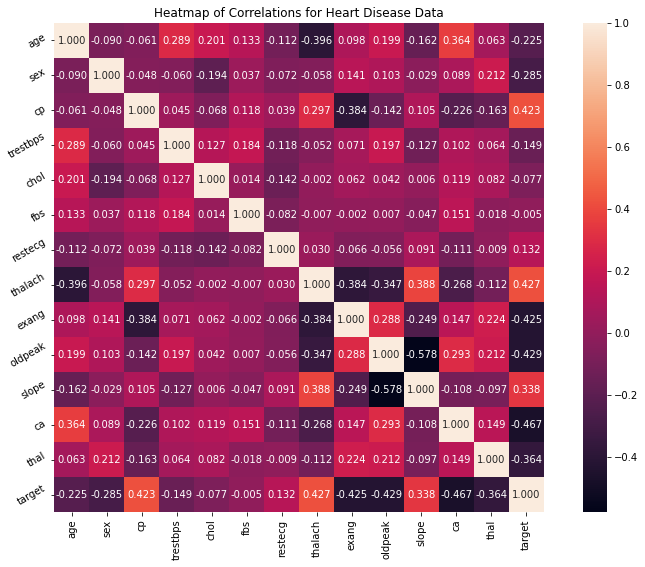

In [66]:
plt.figure(figsize=(14,9))
plt.title('Heatmap of Correlations for Heart Disease Data')
heat = sns.heatmap(correlation, square=True, annot=True, fmt='.3f', linecolor='white')
heat.set_xticklabels(heat.get_xticklabels(), rotation=90)
heat.set_yticklabels(heat.get_yticklabels(), rotation=30)           
plt.show()

In [120]:
#we observe moderate negative correlation between oldpeak and slope (-0.577) which means that when oldpeak is high ,meaning  ST depression induced by exercise relative to rest  then slope is low which refers to the slope of the peak exercise ST segment which seems logical.
#also moderate positive correlation we have oldpeak and the target as well as moderate negative correlation between exang and the target which means increased ST depression by excercise hightens the chance of a heart disease but possible exercise induced angina reduces the probability of a heart disease
#other noteworthy mentions are the near 0 correlations like slope and chol have (-0.004) correlation which means one doesnt affect the other in a meaningfull way and is very close to 0,so the slope of the peak exercise ST segment has little effect on the person's level of cholesterol and the reverse
#another mention is the correlation between thal and fbs which is -0.008 which means the person's fasting blood sugar has little relation with the existence thalassemia on the patient which is intresting

#as respect to correlation of the variables and the target the most correlated variables with it are the cp and thalach in +0.430 each so that means level of chest pain and maximum heart rate achieved affect in a moderate way positively the posibility of a heart disease.In the other side ca and thal moderately correlate negatively with the target with -0.394 and 0.365 each which means the increase of  number of major vessels and possibility of thalasaimia decrease the possibility for a heart disorder
#fbs and chol correlate with the target at -0.018 and -0.087 each which means they affect little the target variable as the are nearing 0 correlation with it

In [67]:
#We will check for outliers in the data
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [68]:
feat_list = heart_df.loc[:, heart_df.columns != 'target'].columns
print(feat_list)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [69]:
#list to detect outliers
outl_list = ['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Visual Outlier Spotting

In [70]:
def spot_outlier(df,x_axis,y_axis):#this function will take a dataframe as input and 2 features in the form of x_axis and y_axis and it will make a plot out of them to spot potential outliers

    xaxis_df = pd.DataFrame(data=x_axis)
    yaxis_df = pd.DataFrame(data=y_axis)
    #print(feat_df.columns)
    x_feat = str(xaxis_df.columns)
    y_feat = str(yaxis_df.columns)
    
    plt.scatter(x=x_axis[df.target==1], y=y_axis[(df.target==1)], c="red")
    plt.scatter(x=x_axis[df.target==0], y=y_axis[(df.target==0)])
    plt.legend(["Disease", "Not Disease"])
    plt.xlabel(x_feat) 
    plt.ylabel(y_feat)
    plt.show()

In [71]:
feat_df = pd.DataFrame(data=heart_df['age'])
print(feat_df.age)


0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 296, dtype: int64


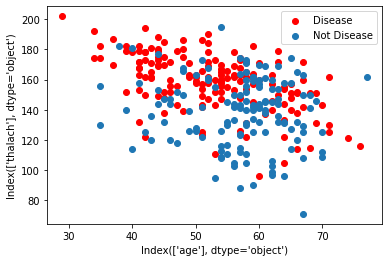

In [72]:
spot_outlier(heart_df,heart_df['age'],heart_df['thalach'])

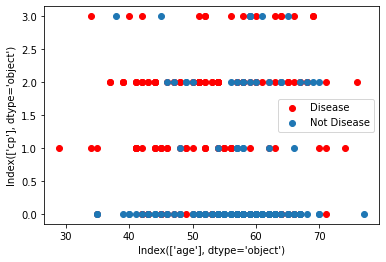

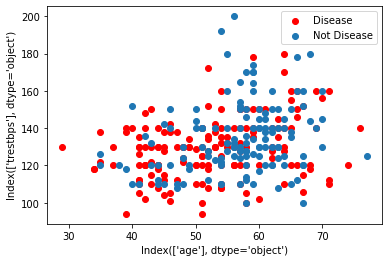

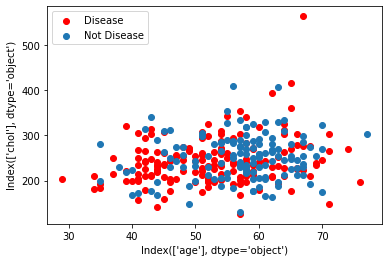

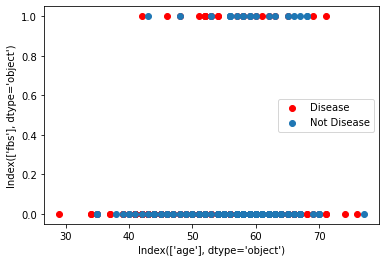

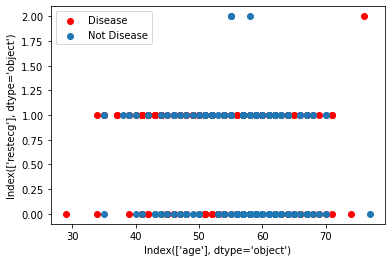

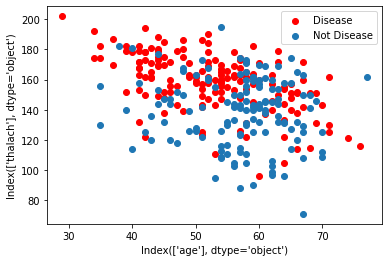

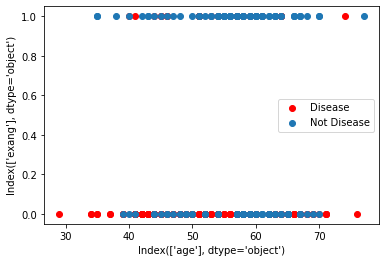

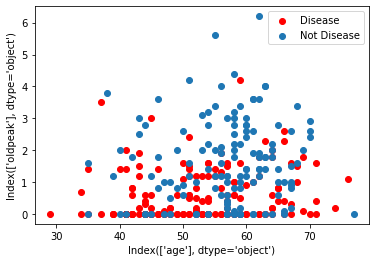

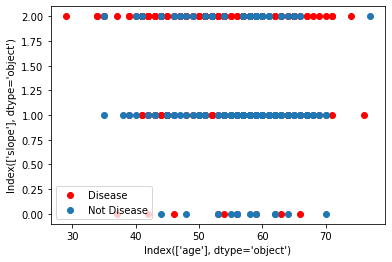

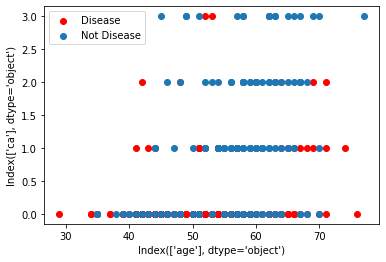

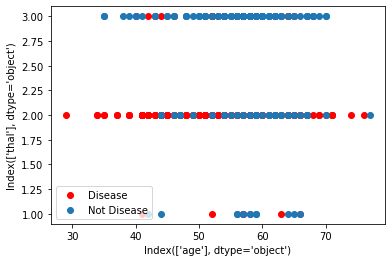

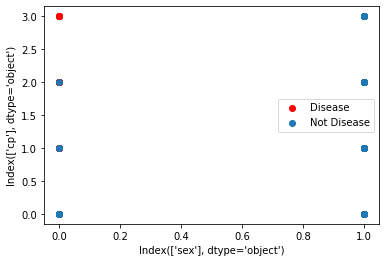

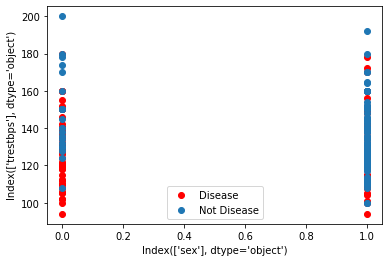

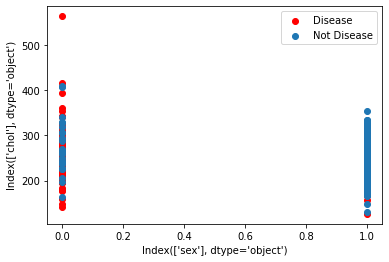

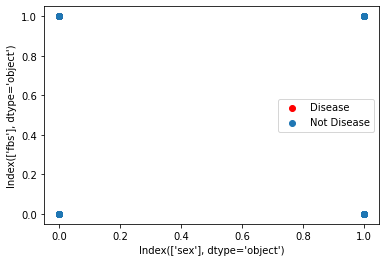

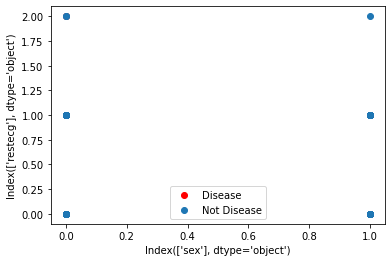

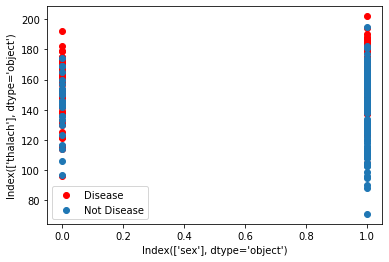

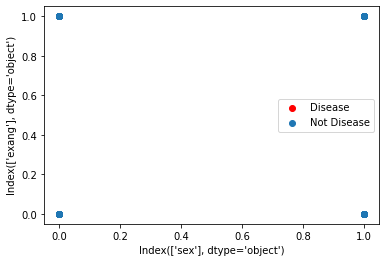

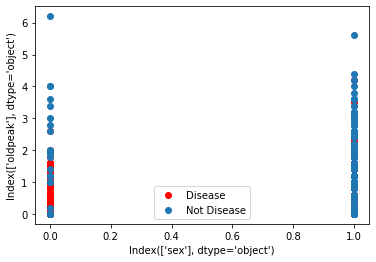

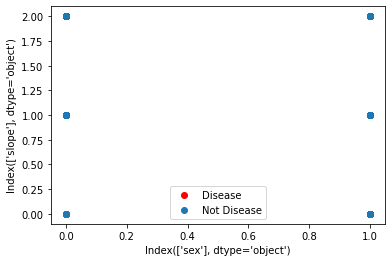

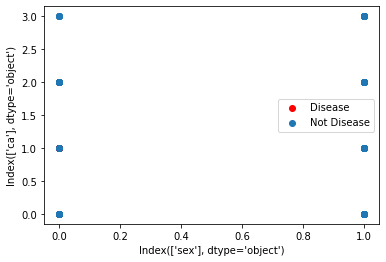

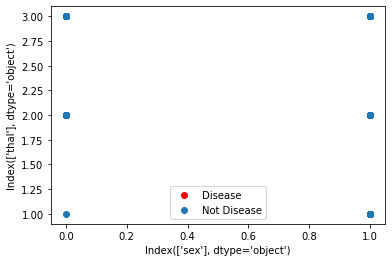

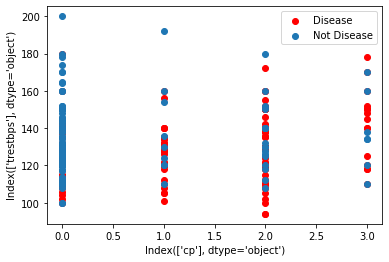

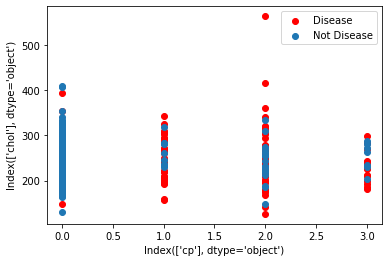

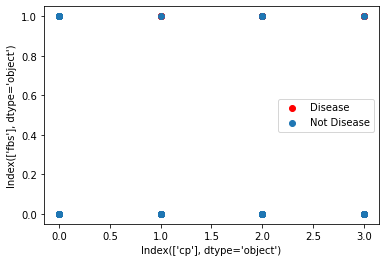

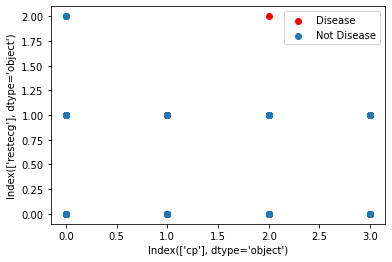

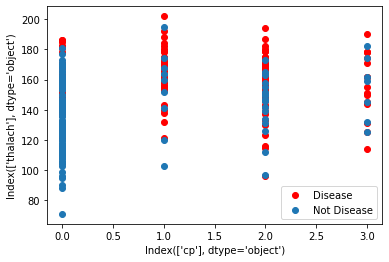

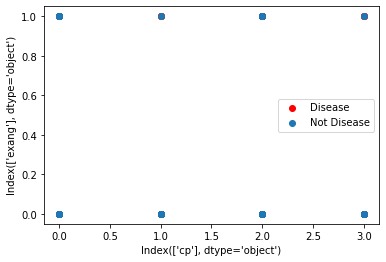

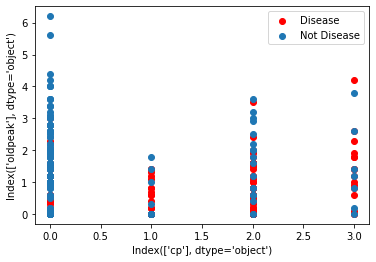

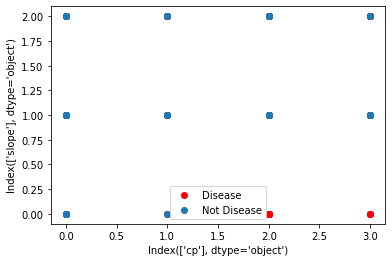

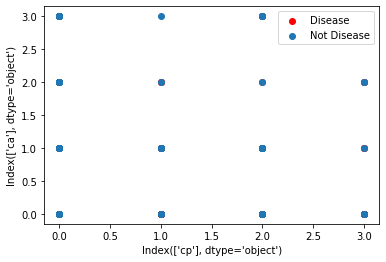

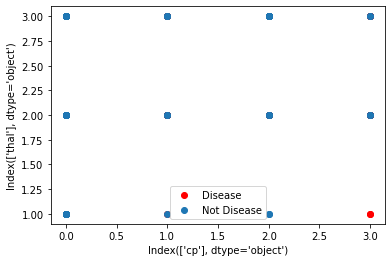

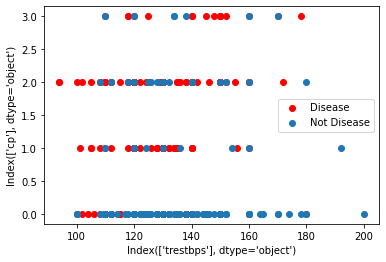

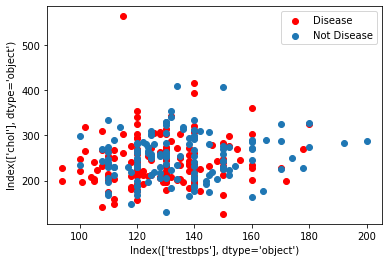

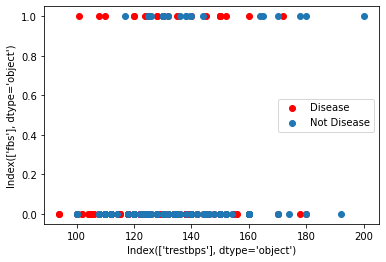

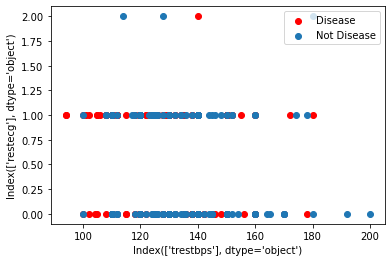

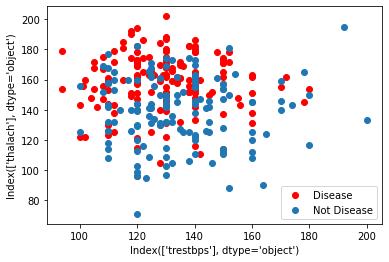

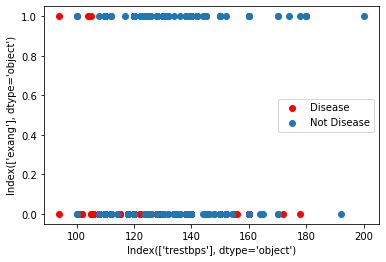

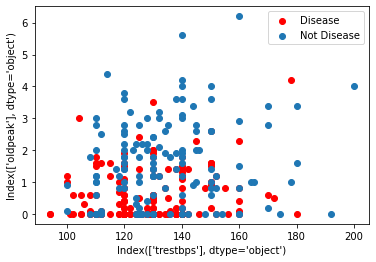

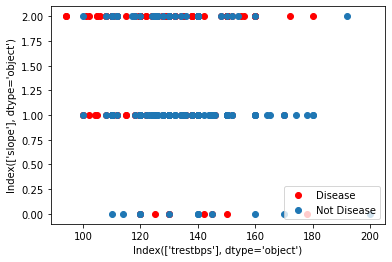

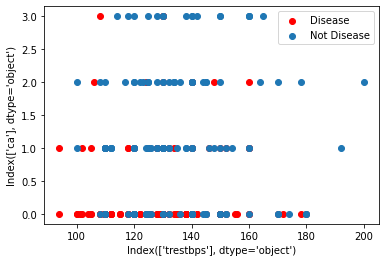

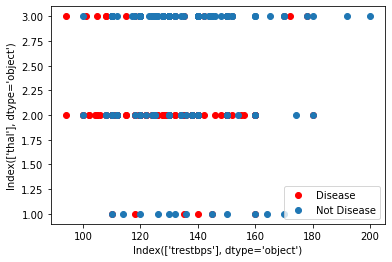

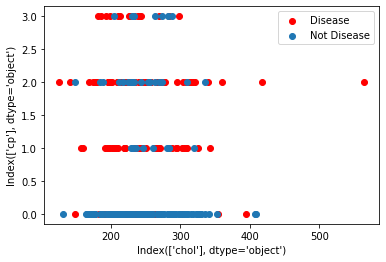

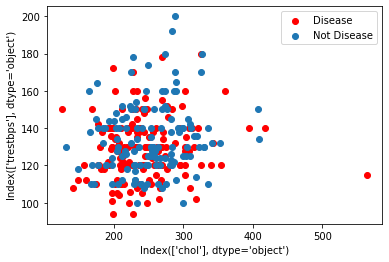

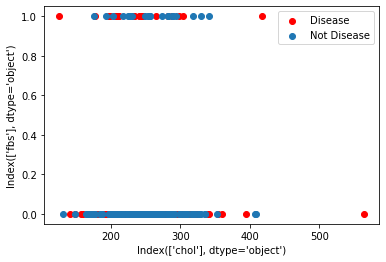

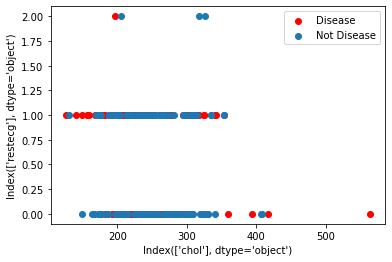

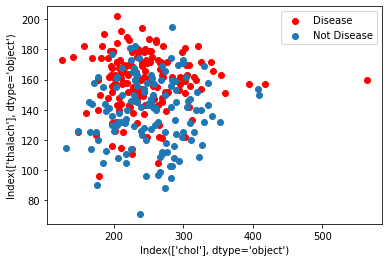

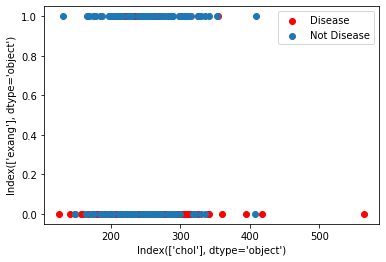

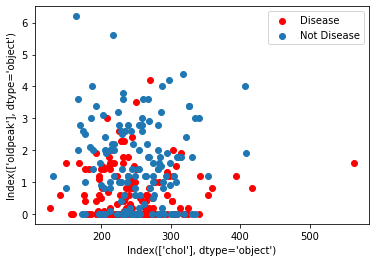

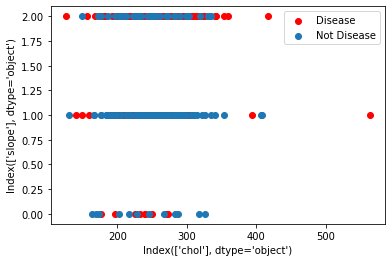

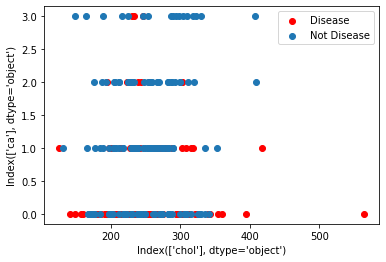

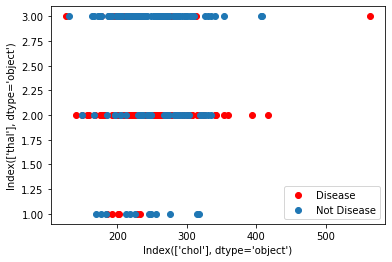

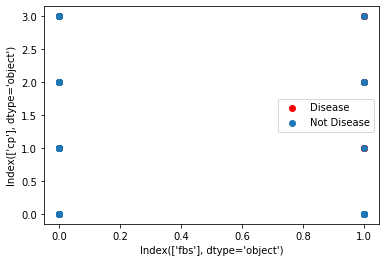

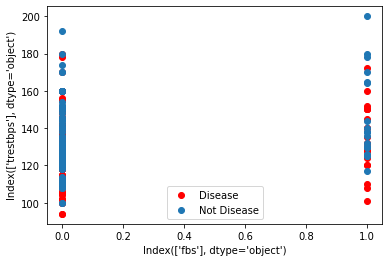

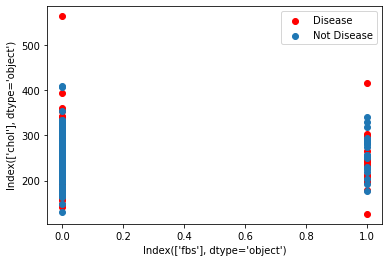

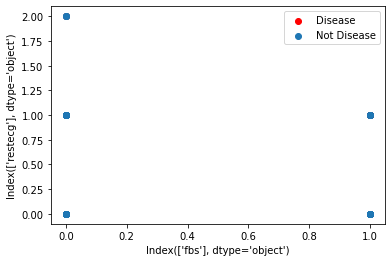

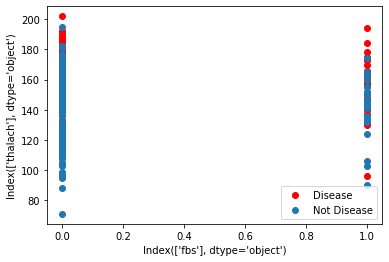

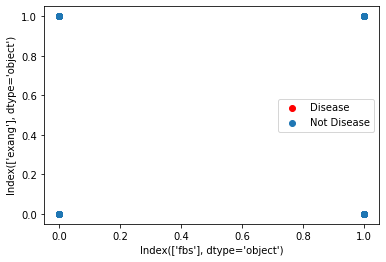

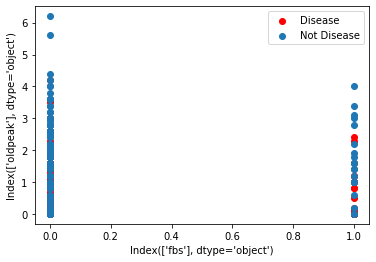

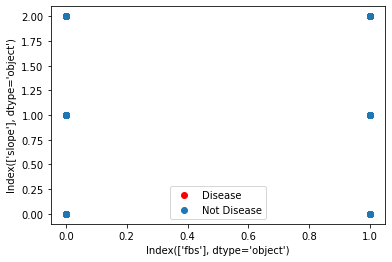

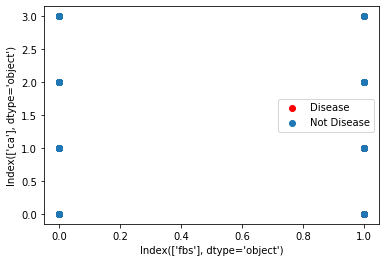

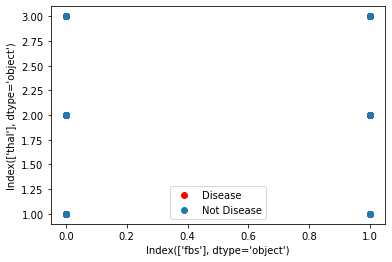

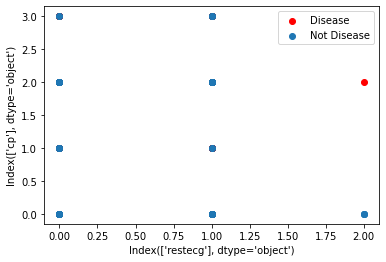

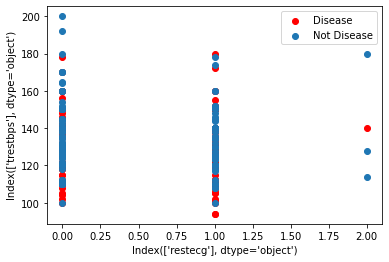

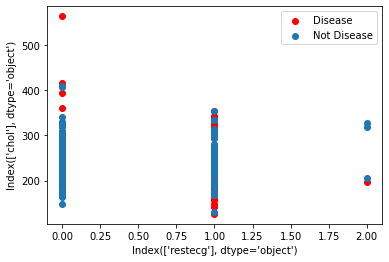

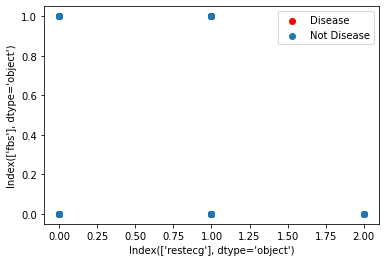

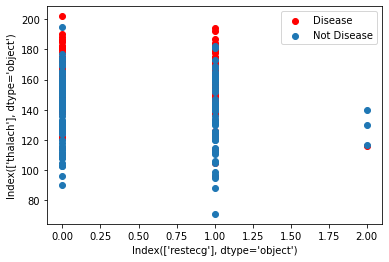

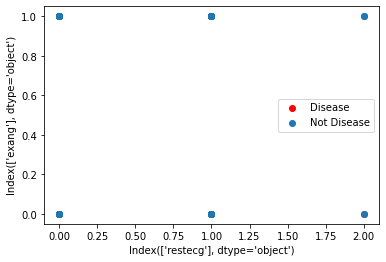

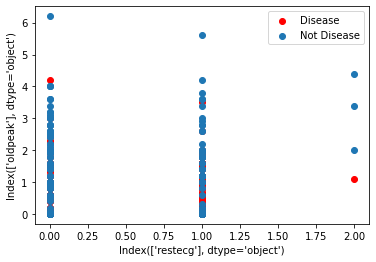

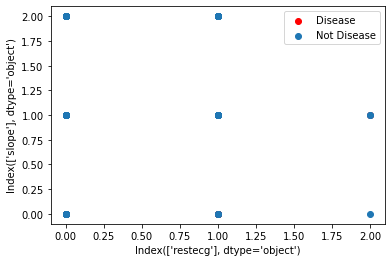

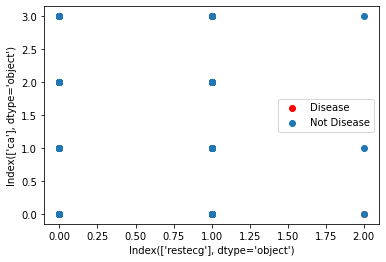

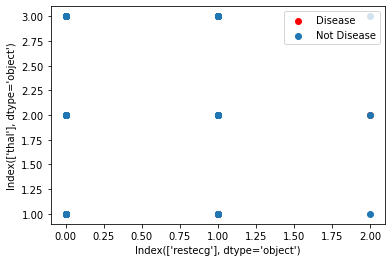

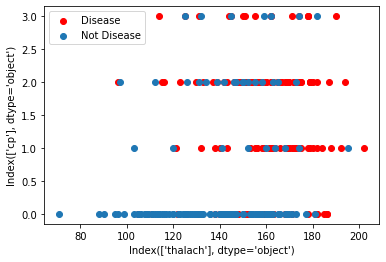

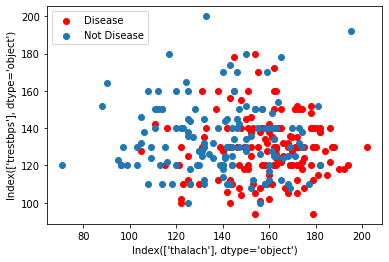

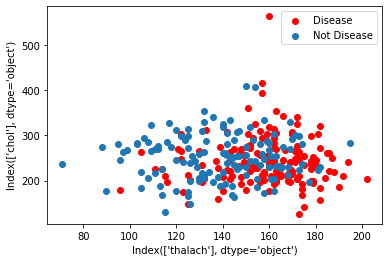

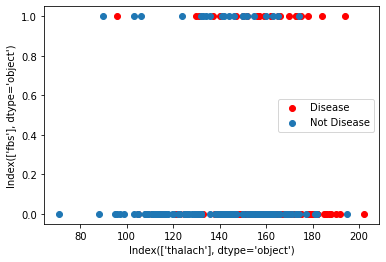

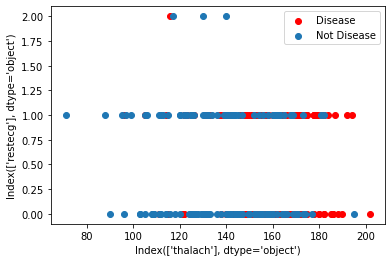

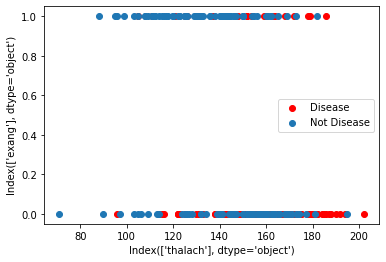

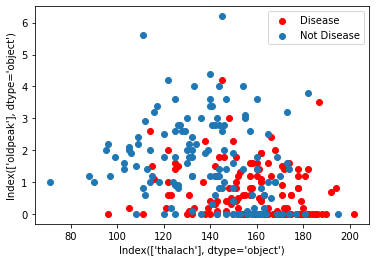

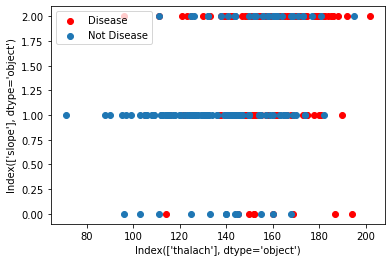

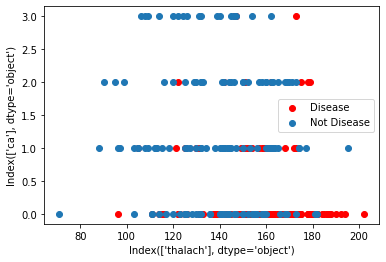

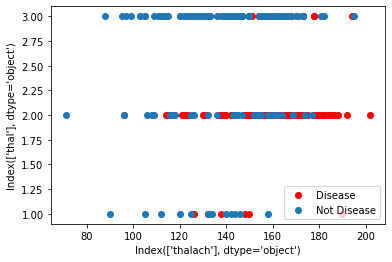

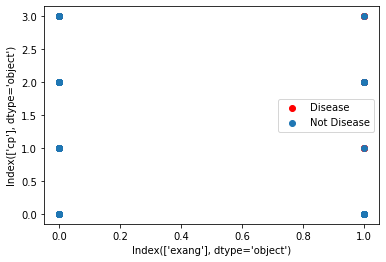

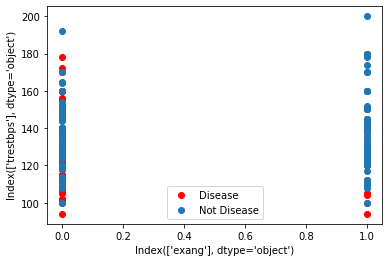

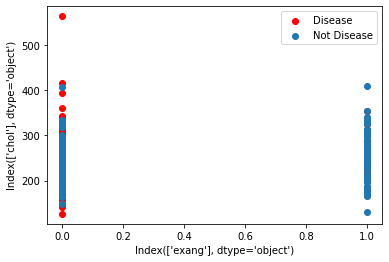

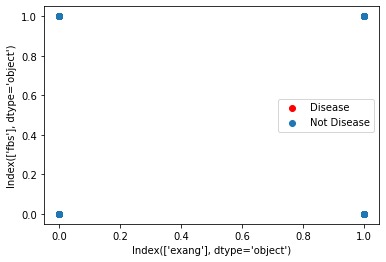

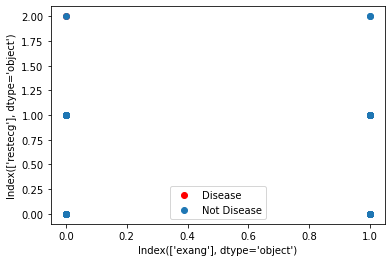

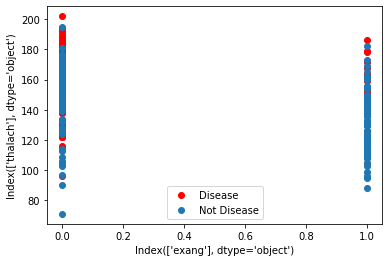

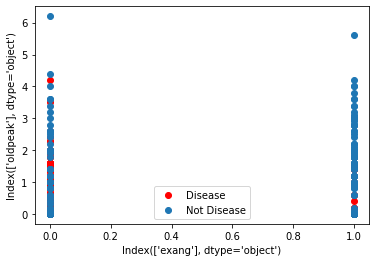

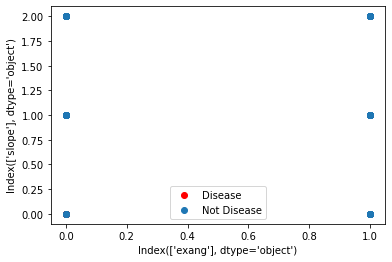

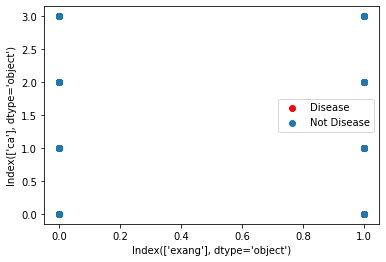

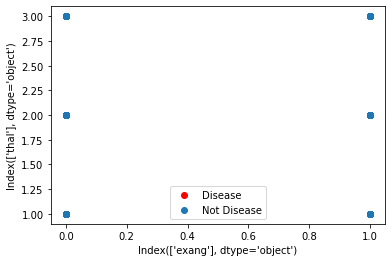

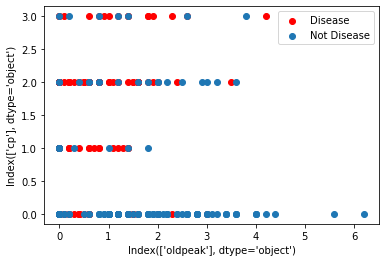

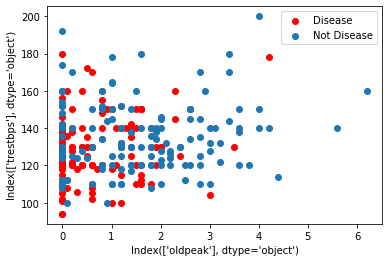

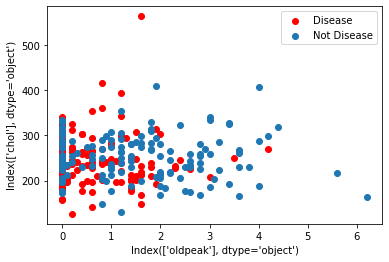

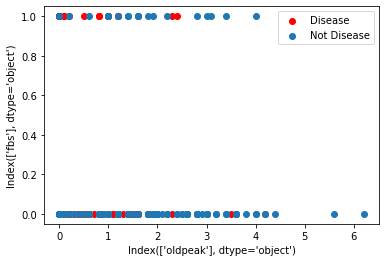

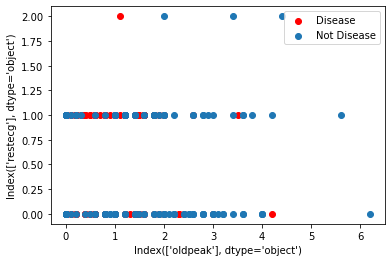

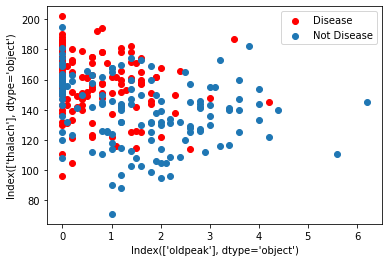

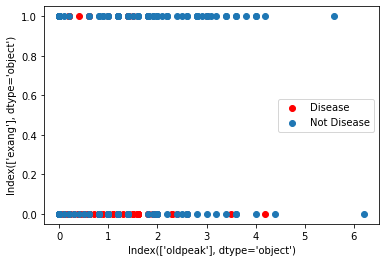

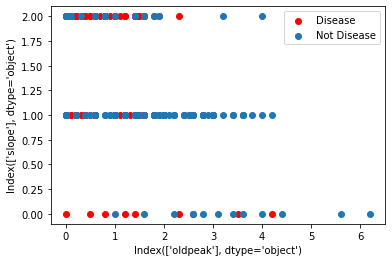

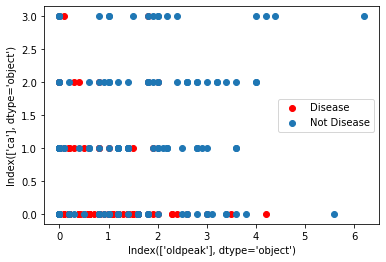

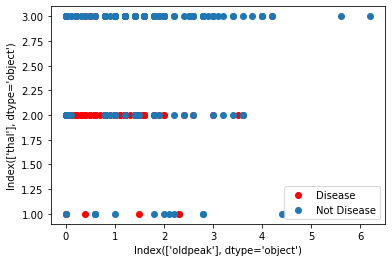

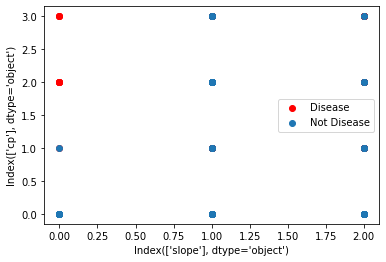

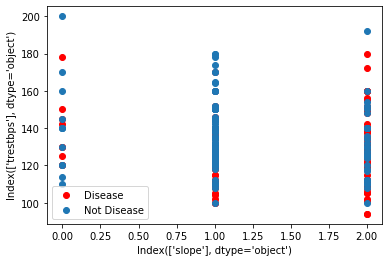

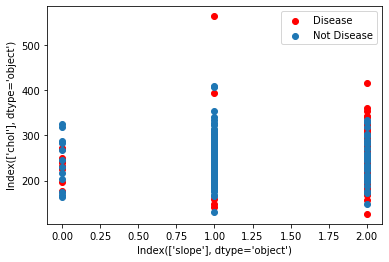

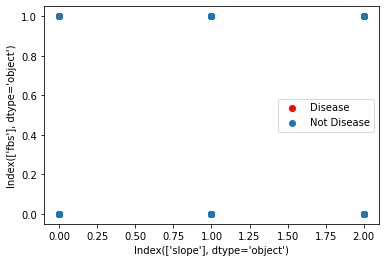

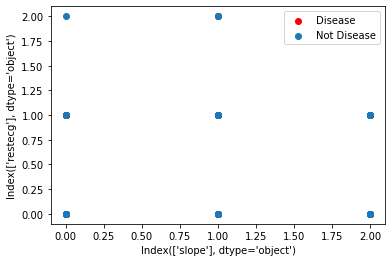

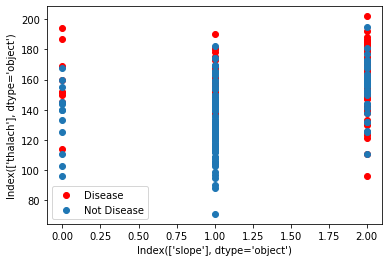

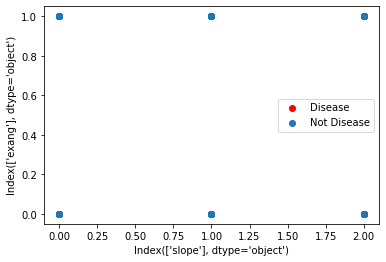

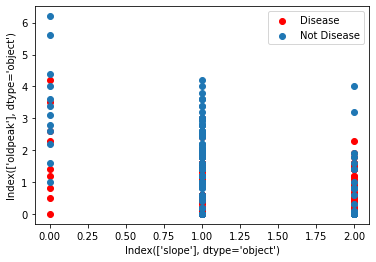

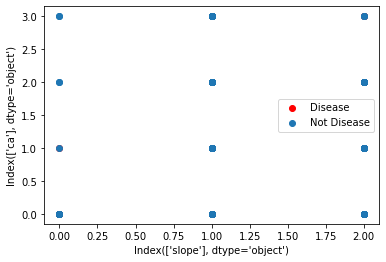

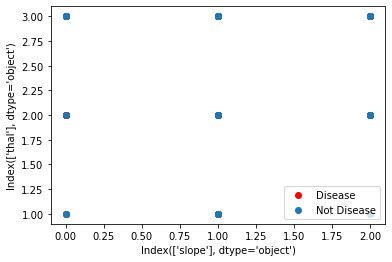

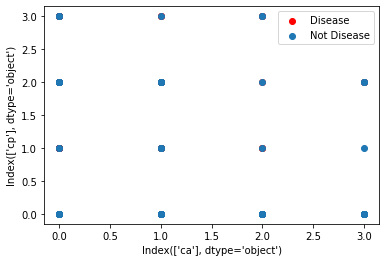

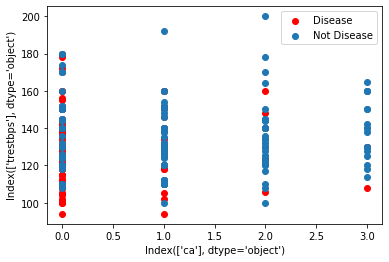

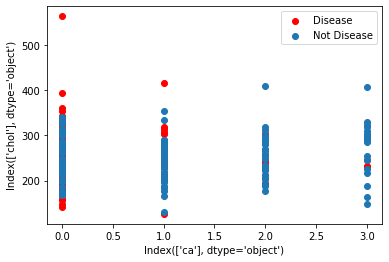

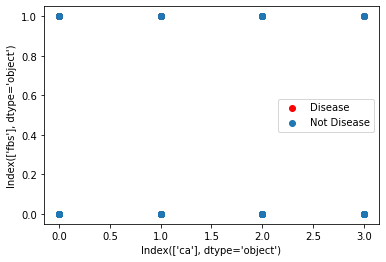

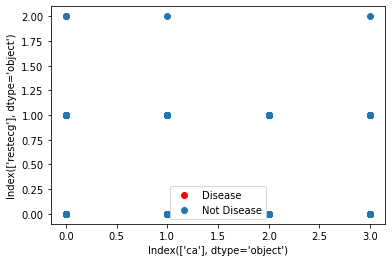

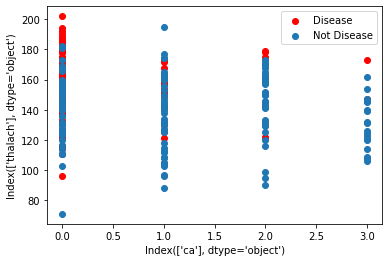

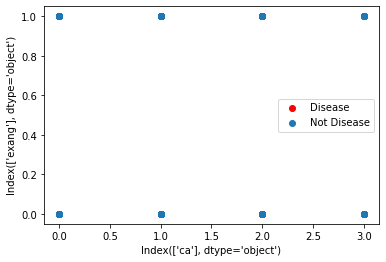

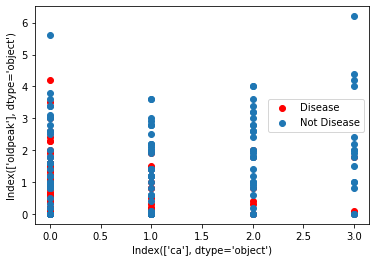

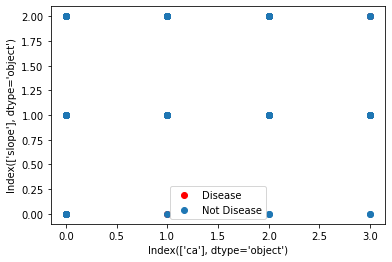

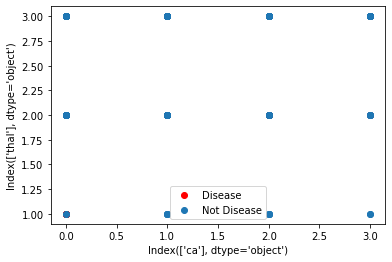

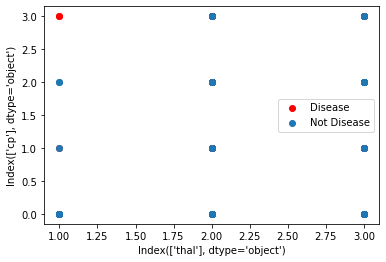

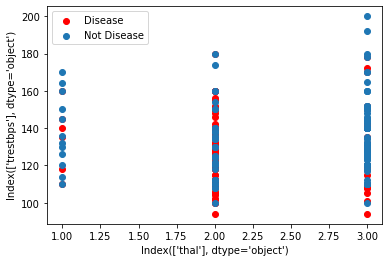

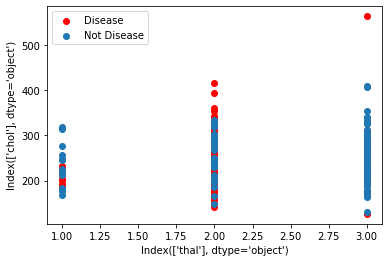

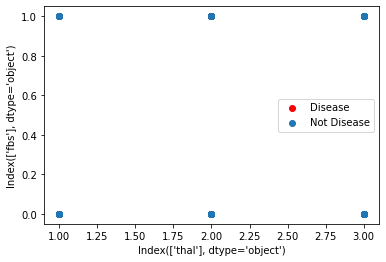

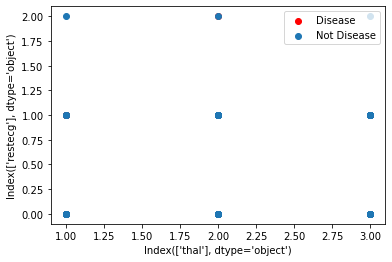

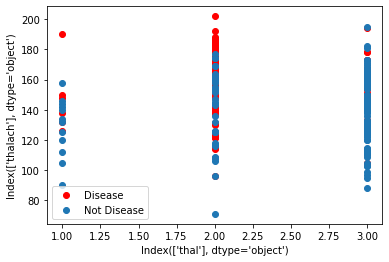

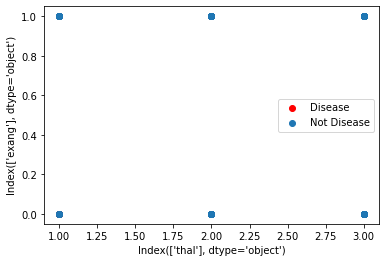

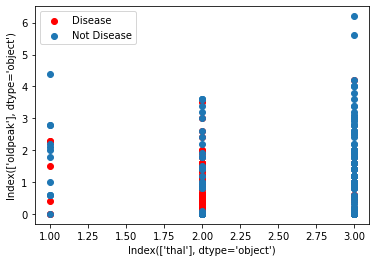

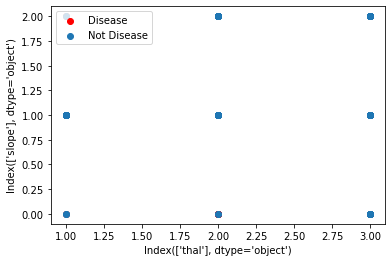

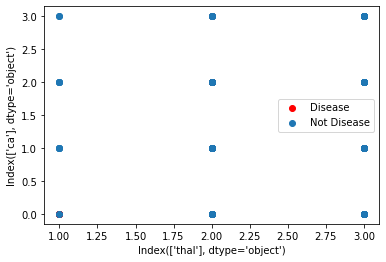

In [73]:
for ind1 in heart_cols: #give a general idea of how the clusters are formed in the data and potential outliers
    for ind2 in outl_list:
        if ind1 != ind2 :
            spot_outlier(heart_df,heart_df[ind1],heart_df[ind2])

# Z-score Outlier Spotting

In [74]:
#Z-score method

#If the z score of a data point is more than 3 (because it cover 99.7% of area), it indicates that the data value is quite different from the other values. It is taken as outliers.
#A Z-score of zero represents a value that equals the mean. The further away an observation's Z-score is from zero, the more unusual it is. A standard cut-off value for finding outliers are Z-scores of +/-3 or further from zero.
out=[]
def Zscore_outlier(heart_df):
    m = np.mean(heart_df)
    sd = np.std(heart_df)
    for i in heart_df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(heart_df['chol'])
#we see that the value 564 is an outlier

Outliers: [417, 564, 407, 409]


In [75]:
Zscore_outlier(heart_df['thalach'])

Outliers: [417, 564, 407, 409, 71]


In [76]:
def calc_zscore():
    for feature in outl_list:
        print("The possible outliers for "+feature+ " are ") 
        Zscore_outlier(heart_df[feature])
        

In [77]:
calc_zscore()

The possible outliers for cp are 
Outliers: [417, 564, 407, 409, 71]
The possible outliers for trestbps are 
Outliers: [417, 564, 407, 409, 71, 200, 192]
The possible outliers for chol are 
Outliers: [417, 564, 407, 409, 71, 200, 192, 417, 564, 407, 409]
The possible outliers for fbs are 
Outliers: [417, 564, 407, 409, 71, 200, 192, 417, 564, 407, 409]
The possible outliers for restecg are 
Outliers: [417, 564, 407, 409, 71, 200, 192, 417, 564, 407, 409]
The possible outliers for thalach are 
Outliers: [417, 564, 407, 409, 71, 200, 192, 417, 564, 407, 409, 71]
The possible outliers for exang are 
Outliers: [417, 564, 407, 409, 71, 200, 192, 417, 564, 407, 409, 71]
The possible outliers for oldpeak are 
Outliers: [417, 564, 407, 409, 71, 200, 192, 417, 564, 407, 409, 71, 6.2, 5.6]
The possible outliers for slope are 
Outliers: [417, 564, 407, 409, 71, 200, 192, 417, 564, 407, 409, 71, 6.2, 5.6]
The possible outliers for ca are 
Outliers: [417, 564, 407, 409, 71, 200, 192, 417, 564, 407,

In [ ]:
#the outliers for cp is the value 71
#for trestbps the outlier is 71
#for chol again 71
#again for fbs 71
#for restecg 1
#for thalach 71
#for exang 71
#for oldpeak its 6.2 and 5.6
#for ca its 6.2 and 5.6
#for thal its 6.2 and 5.6

In [ ]:
#for thalach 71 seems as an outlier,biggest differece with other values in z_score so we will remove it

In [78]:
heart_df[heart_df['oldpeak']==5.6].index

Int64Index([221], dtype='int64')

In [79]:
heart_df[heart_df['oldpeak']==6.2].index

Int64Index([204], dtype='int64')

In [80]:
heart_df.drop(221,inplace=True)

In [81]:
heart_df.drop(204,inplace=True)

In [323]:
#Lets try to delete outliers
heart_df[heart_df['chol']==564].index # ----> uncomment this to detect the index of the outlier
# checking data shape befor dropping
#print(heart_df.shape)
# dropping outlier value
#heart_df.drop(85,inplace=True)# ----->uncomment this to drop the outlier
# checking data shape after dropping
#print(heart_df.shape)

Int64Index([], dtype='int64')

In [82]:
#Lets try to delete outliers by removing 71 index this outlier is remove from the rest of the other features as well
#heart_df[heart_df['thalach']==71].index # ----> uncomment this to detect the index of the outlier
# checking data shape befor dropping
#print(heart_df.shape)
# dropping outlier value
#heart_df.drop(272,inplace=True)# ----->uncomment this to drop the outlier
# checking data shape after dropping
print(heart_df.shape)

(294, 14)


In [ ]:
#now that we droped outliers lets see model perfomance

In [54]:
#for col in heart_cols:
 #   ax = sns.countplot(x=col, hue="target", data=heart_df)
    
  #  plt.show()

In [84]:
heart_df['target'].value_counts()

1    160
0    134
Name: target, dtype: int64

In [83]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    int64  
 4   chol      294 non-null    int64  
 5   fbs       294 non-null    int64  
 6   restecg   294 non-null    int64  
 7   thalach   294 non-null    int64  
 8   exang     294 non-null    int64  
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    int64  
 11  ca        294 non-null    int64  
 12  thal      294 non-null    int64  
 13  target    294 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.5 KB


In [85]:
heart_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


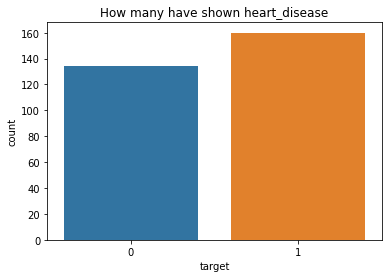

In [86]:
sns.countplot(x='target', data=heart_df)
plt.title("How many have shown heart_disease")
plt.show()

In [19]:
#we observe that many of the specimens in this dataset havent experienced heart disease so we employ smote as a first way to try to fix this imblalance

#X = heart_df.drop('target',axis=1)
#Y = heart_df['target']
#Y.value_counts()

In [87]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [88]:
#we will have 2 sets of columns-> one set with continuous numerical feature columns and the other with categorical features
#sex,cp,fbs,restegcg,exang,slope,ca,thal
categ_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
contin_cols = ['age','trestbps','chol','thalach','oldpeak']


In [92]:
#We will turn categorical variables into dummies so it they can be processed effectively when we use a training model on the dataset
categ_cols.remove('target') #uncomment this once to get the target out of the categorical values or else there will be an error,if you have executed this command one time then comment this as to not produce an error on repetitive execution of it since target is already removed

pd_dummies = pd.get_dummies(heart_df,columns = categ_cols)


In [90]:
pd_dummies.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3,target_0,target_1
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,37,130,250,187,3.5,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
2,41,130,204,172,1.4,1,0,0,1,0,...,1,1,0,0,0,0,1,0,0,1
3,56,120,236,178,0.8,0,1,0,1,0,...,1,1,0,0,0,0,1,0,0,1
4,57,120,354,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,1,0,0,1


In [48]:
#We will also use StandardScaler to standardize our continuous features  by removing the mean and scaling to unit variance.Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.

#std_scaler = StandardScaler()
#pd_dummies[contin_cols] = std_scaler.fit_transform(pd_dummies[contin_cols])


In [49]:
#pd_dummies.head()

In [94]:
#we define the X,Y sets that will be used for training
X = pd_dummies.drop('target', axis=1)
Y = pd_dummies['target']


#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [95]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 302
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        294 non-null    int64  
 1   trestbps   294 non-null    int64  
 2   chol       294 non-null    int64  
 3   thalach    294 non-null    int64  
 4   oldpeak    294 non-null    float64
 5   sex_0      294 non-null    uint8  
 6   sex_1      294 non-null    uint8  
 7   cp_0       294 non-null    uint8  
 8   cp_1       294 non-null    uint8  
 9   cp_2       294 non-null    uint8  
 10  cp_3       294 non-null    uint8  
 11  fbs_0      294 non-null    uint8  
 12  fbs_1      294 non-null    uint8  
 13  restecg_0  294 non-null    uint8  
 14  restecg_1  294 non-null    uint8  
 15  restecg_2  294 non-null    uint8  
 16  exang_0    294 non-null    uint8  
 17  exang_1    294 non-null    uint8  
 18  slope_0    294 non-null    uint8  
 19  slope_1    294 non-null    uint8  
 20  slope_2   

In [ ]:
#Methods that we will try to use for predicting

#Linear Regression
#Knn
#RandomForest
#XGBOOST


In [ ]:
#Definitions

#TP(True Positive) : sample is positive instance and prediction positive (a instance patient that should be classified as having heart disease it is indeed classified as having one)

#TN(True Negative) : sample is negative instance and prediction is negative (an instance patient that should  be classified as having no heart disease it is classified as such)
 
#FP(False Positive) : sample is negative instance but prediction is positive(it means an instance that should classify as a patient with no heart disease it is classified as one)

#FN(False Negative) : sample is positive instance but the prediction is negative (it means this instance should be classified as patient with heart disease but it does not)

In [ ]:
# Metrics

#Recall : TP/(TP + FN) ,so it means the ratio of the true positives to the sum of the true positves and false negatives 

#Precision : TP/(FP + TP) so it means the ratio of the true positives to the sum of the false positives and the true positives this means the percentage of instances classified correctly from the whole set of correctly positive classified ones and the false positive classified ones

#F1_metric : 2*Precision*Recall/(Precision + Recall)

In [96]:
#here we define the metrics we will use in the neural network by hand because the default options are not supported 
def recall_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_metric(y_true, y_pred):
    precision = precision_metric(y_true, y_pred)
    recall = recall_metric(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [97]:
#Try to make a type of neural network for the problem,try keras

#turn the X set of dependent variables into a numpay array that can be inserted into the neural network


X_np = np.array(X)


In [98]:
print(X_np)

[[ 63. 145. 233. ...   1.   0.   0.]
 [ 37. 130. 250. ...   0.   1.   0.]
 [ 41. 130. 204. ...   0.   1.   0.]
 ...
 [ 68. 144. 193. ...   0.   0.   1.]
 [ 57. 130. 131. ...   0.   0.   1.]
 [ 57. 130. 236. ...   0.   1.   0.]]


In [25]:
X_np.shape

(294, 28)

In [17]:
#with these classifiers try to make a function that will,analoga me tis parametrous,tha efarmozei tous akolothous algorithmous classification me standardization eite oversampling eite undersampling eite normalization kai epeita tha exigeis ta apotelesmata

In [99]:
def doPredicts(X_train,Y_train,X_test,Y_test,X_np):#here we do predictions for a dataset based on a multitude of models like linear regression,knn SVM and more
    #do model predictions: #the function takes as parameters the train and test sets for a dataset based on the split that has been done previously and also the dataset converted into a np array so as it can be inputed into the neural network 
    
    
    # 1 logistic regression ,useful info: Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary)
    
    modlLogReg = LogisticRegression(solver='liblinear')#liblinear good for small datasets like this one
    modlLogReg.fit(X_train, Y_train) 

    Y_log = modlLogReg.predict(X_test)
    #acc = accuracy_score(Y_test,Y_log)
    
    #[
    #print('Logistic Regression Model 1 Accuracy: %.3f' % (acc*100))
    #report = classification_report(Y_test,Y_hat)
    #print(report)
    #]
    
    # 2 svm classifier
    
    modlSVM = SVC(random_state=1)
    modlSVM.fit(X_train, Y_train)

    Y_svm = modlSVM.predict(X_test)
    #acc = accuracy_score(Y_test,Y_svm)
    
    # 3 naive bayes classifier
    
    modlNB = GaussianNB()
    modlNB.fit(X_train, Y_train)

    Y_NaivBays = modlNB.predict(X_test)
    
    
    # 4 decision tree classifier
    
    modlDT = DecisionTreeClassifier(random_state=42)
    modlDT.fit(X_train, Y_train)

    Y_DT = modlDT.predict(X_test)
    
    
    # 5 linear regression
    
    #modlLinReg = LinearRegression()
    #modlLinReg_fit = modlLinReg.fit(X_train, Y_train)
    #Y_LinReg = modlLinReg_fit.predict(X_test)
    
    #5 SVC C-Support Vector Classification SVC is a nonparametric clustering algorithm that does not make any assumption on the number or shape of the clusters in the data. In our experience it works best for low-dimensional data
    #svm_model = SVC()
    #svc_fit = svm_model.fit(X_train, Y_train)
    #Y_svc = svc_fit.predict(X_test)
    
    # 6 knn classifier
    modl_Knn = KNeighborsClassifier()#run with default n=5 neighbours
    modl_Knn.fit(X_train, Y_train)
    Y_Knn = modl_Knn.predict(X_test)
    
    
    # 7 random forest
    
    modl_Randf = RandomForestClassifier(n_estimators=1000, random_state=42)
    modl_Randf.fit(X_train, Y_train)
    Y_randf = modl_Randf.predict(X_test)
    
    
    # 8 xgb classifier
    modl_xgb = XGBClassifier(use_label_encoder=False)
    modl_xgb.fit(X_train, Y_train)
    Y_xgb = modl_xgb.predict(X_test)
    
    # 9 neural network
    
    model = Sequential()
    model.add(Dense(32, input_shape=(X_np.shape[1],), activation='relu')) # Add an input shape! (features,) # default we had 32 then 32 then 1,we test 32,28 and 1 and it seems to have better results 
    model.add(Dense(28, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary() 

    # compile the model
    model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy',
                        f1_metric, 
                        precision_metric, 
                        recall_metric])

    # early stopping callback
    # This callback will stop the training when there is no improvement in  
    # the validation loss for 10 consecutive epochs.  
    es = EarlyStopping(monitor='accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=7,
                                   restore_best_weights=True)

    # now we just update our model fit call
    history = model.fit(X_np,
                    Y,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size = 8,    
                    validation_split=0.3,
                    shuffle=True,
                    verbose=1)
    
    #now we will try to compare the models and their perfomance based on metrics like f1 score,precision,recall,and accuracy
    #we will define a list in python with all the final prediction sets and we will run on that our metrics we want to see like mentioned above
    predicts_list = [Y_log,Y_svm,Y_NaivBays,Y_DT,Y_Knn,Y_randf,Y_xgb]#,history]
    
    predDict = {
                1:  { "name" : "Logistic Regression" , "pred": predicts_list[0]}, 2 : { "name" : "SVM" , "pred": predicts_list[1]}, 3 : { "name" : "Naive Bayes" , "pred": predicts_list[2]},4 : { "name" : "Decision Tree" , "pred": predicts_list[3]},5 : { "name" : "K-nearest neighboors" , "pred": predicts_list[4]},6 : { "name" : "Random Forest" , "pred": predicts_list[5]}, 7 : { "name" : "Xgboost" , "pred": predicts_list[6]}#, 9 : { "name" : "Neural Network" , "pred": predicts_list[8]}
               }
    
    #now we will do our comparison with roc curves,scores and also some bar plots
    #for key_pred in pred:
    for key_pred in predDict:
        pred_val = predDict[key_pred]['pred']
        pred_name = predDict[key_pred]['name']                      
        acc = accuracy_score(Y_test,pred_val)
        report = classification_report(Y_test,pred_val)
        print(pred_name + 'Accuracy: %.4f' % (acc*100))
        print(" Full report for "+ pred_name)
        print( report  )
        
        probs = pred_val
        #preds = probs[:,1]
        fpr, tpr, threshold = roc_curve(Y_test, probs)
        roc_auc = auc(fpr, tpr)

        plt.title('Receiver Operating Characteristic for '+ pred_name)
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
    

In [100]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
#doPredicts(X_train,Y_train,X_test,Y_test,X_np)
#X_test.head

In [101]:
X.shape

(294, 28)

In [102]:
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0


In [103]:
Y.shape

(294,)

In [104]:
#Geniki synartisi me tin opoia epilegoume na trexoume ena montelo mixanikis mathisis sto dataset me eidikes synthikes na exoun efarmostei prota opos standardization,normalization,over/under sampling,dummy columns or no preprocessing
#parametroi:  smote:0 means dont do oversampling with smote , 1 means do oversampling with smote | undersamp : 0 means dont do undersampling , 1 means do undersampling | standard : 0 meands dont do standardization , 1 means do standardization | normalz : 0 means dont do normalization ,1 means do normalization, prepoc: 0 means dont do any of the afforementioned preprocessing methods,any value other than 0 means we allow preprocessing methods
#you can have a parameter picking the model you want to do or just let it do all the models after it has finished preprocessing or not

def model_sel(X,Y,smote,undersamp,standard,normalz,preproc):
    
    
    
    #X_proc = X
    #Y_proc = Y
    
    if(preproc != 0):#select one of the preprocessing methods
        
        if(smote == 1 and undersamp == 0):#we can only do one type of sampling at each running
            smote = SMOTE(random_state=42)
            X_proc, Y_proc = smote.fit_resample(X,Y)
            X_train, X_test, Y_train, Y_test = train_test_split(X_proc, Y_proc, test_size=0.3, random_state=42)  
        elif(smote == 1 and undersamp == 1):
            print("You cant do both oversampling and undersampling at the same time,so none of these methods will be used in this training")
        
        if(undersamp == 1 and smote == 0):
            rus = RandomUnderSampler(random_state=42)
            X_proc, Y_proc = rus.fit_resample(X, Y)
            X_train, X_test, Y_train, Y_test = train_test_split(X_proc, Y_proc, test_size=0.3, random_state=42)
      
        
        if(standard == 1):
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            
            #X_proc = X_std
            #X_proc = DataFrame(X_std,columns=('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'))
            Y_proc = Y    
        if(normalz == 1):
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
            X_train = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train))
            X_test = (X_test - np.min(X_test)) / (np.max(X_test) - np.min(X_test))
            
            #Y_proc = Y
    #after preprocessing do the models you want, and create reports for them as well as roc curves for each one   
       #first split then do normalization/standardization
        #X_train, X_test, Y_train, Y_test = train_test_split(X_proc, Y_proc, test_size=0.3, random_state=42)
        doPredicts(X_train,Y_train,X_test,Y_test,X_np) 
    else:
       # X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
        doPredicts(X_train,Y_train,X_test,Y_test,X_np)
         #do here models without preprocessing also create reports for them and roc curves for each one
    

In [105]:
def runModels():
    model_sel(X,Y,smote,undersamp,standard,normalz,preproc)
    X_train, X_test, Y_train, Y_test = train_test_split(X_proc, Y_proc, test_size=0.3, random_state=42)
    doPredicts(X_train,Y_train,X_test,Y_test,X_np) 
    
    

[19:24:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                928       
_________________________________________________________________
dense_22 (Dense)             (None, 28)                924       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 29        
Total params: 1,881
Trainable params: 1,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
26/26 [==============================] - 2s 29ms/step - loss:

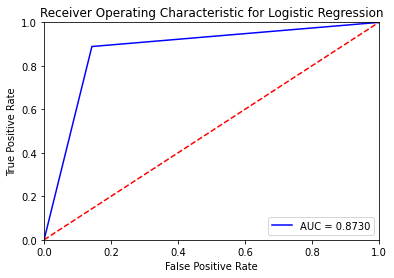

SVMAccuracy: 87.6404
 Full report for SVM
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.91      0.89      0.90        54

    accuracy                           0.88        89
   macro avg       0.87      0.87      0.87        89
weighted avg       0.88      0.88      0.88        89



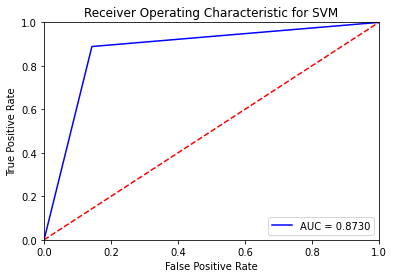

Naive BayesAccuracy: 86.5169
 Full report for Naive Bayes
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        35
           1       0.92      0.85      0.88        54

    accuracy                           0.87        89
   macro avg       0.86      0.87      0.86        89
weighted avg       0.87      0.87      0.87        89



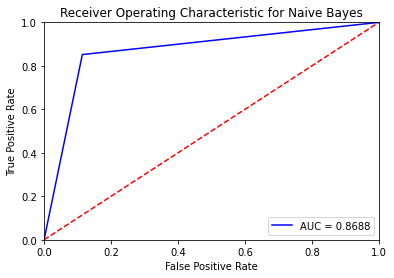

Decision TreeAccuracy: 82.0225
 Full report for Decision Tree
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        35
           1       0.85      0.85      0.85        54

    accuracy                           0.82        89
   macro avg       0.81      0.81      0.81        89
weighted avg       0.82      0.82      0.82        89



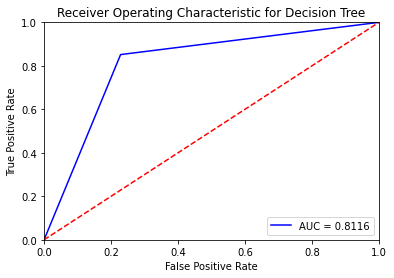

K-nearest neighboorsAccuracy: 82.0225
 Full report for K-nearest neighboors
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        35
           1       0.88      0.81      0.85        54

    accuracy                           0.82        89
   macro avg       0.81      0.82      0.81        89
weighted avg       0.83      0.82      0.82        89



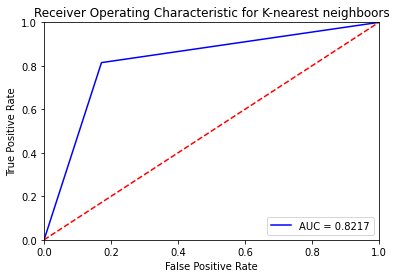

Random ForestAccuracy: 85.3933
 Full report for Random Forest
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.89      0.87      0.88        54

    accuracy                           0.85        89
   macro avg       0.85      0.85      0.85        89
weighted avg       0.85      0.85      0.85        89



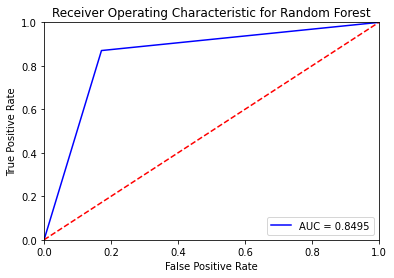

XgboostAccuracy: 82.0225
 Full report for Xgboost
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        35
           1       0.87      0.83      0.85        54

    accuracy                           0.82        89
   macro avg       0.81      0.82      0.81        89
weighted avg       0.82      0.82      0.82        89



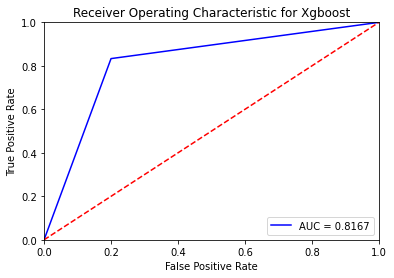

In [108]:

model_sel(X,Y,0,0,1,1,1)